In [58]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
plt.rcParams.update({'font.size': 13.5})
#plt.rcParams["figure.figsize"] = (10,10)

## With much help from the code for Fig. 8.2 in the book
from astroML.linear_model import LinearRegression

In [59]:
import linmix

## Mass Plots

In [60]:
char_csv = './GW_table.csv' #'https://raw.githubusercontent.com/charlotteolsen/astrostats_GWproject/master/GW_table%20.csv?token=AHEQX66DQQ6LIVKSPRLCFES5Z3S6W'
csv_confirmed = pd.read_csv(char_csv)

In [61]:
csv_confirmed.columns

Index(['Event', 'Primary mass (M_sun)', 'Secondary mass (M_sun)',
       'Effective inspiral spin', 'chirp mass (M_sun)', 'Final spin',
       'Final mass (M_sun)', 'Luminosity distance (Mpc)',
       'Peak Luminosity (10^56 erg s^-1)', 'FAR cWB (yr^-1)',
       'FAR gstLAL (yr^-1)', 'FAR PyCBC  (yr^-1)', 'Sky Lovalization (deg^2)',
       'Network SNR cWB', 'Network SNR gstLAL', 'Network SNR PyCBC'],
      dtype='object')

In [62]:
csv_confirmed

,Event,Primary mass (M_sun),Secondary mass (M_sun),Effective inspiral spin,chirp mass (M_sun),Final spin,Final mass (M_sun),Luminosity distance (Mpc),Peak Luminosity (10^56 erg s^-1),FAR cWB (yr^-1),FAR gstLAL (yr^-1),FAR PyCBC (yr^-1),Sky Lovalization (deg^2),Network SNR cWB,Network SNR gstLAL,Network SNR PyCBC
0,GW150914,35.6 +4.8-3.0,30.6 +3.0-4.4,-0.02,28.6 +1.6-1.5,0.69 +0.05-0.04,63.1 +3.3-3.0,430 +150-170,3.6 +0.4-0.4,< 1.63e-04,< 1.00e-07,< 1.53e-05,179,25.2,24.4,23.6
1,GW151012,23.3 +14.0-5.5,13.6 +4.1-4.8,0.04 +0.28-0.19,15.2 +2.0-1.1,0.67 +0.13-0.11,35.7 +9.9-3.8,1060 +540-480,3.2 +0.8-1.7,NaN,7.92E-03,0.17,1555,NaN,10.0,9.5
2,GW151226,13.7 +8.8-3.2,7.7 +2.2-2.6,0.18 +0.20-0.12,8.9 +0.3-0.3,0.74 +0.07-0.05,20.5 +6.4-1.5,440 +180-190,3.4 +0.7-1.7,0.02,< 1.00e-07,< 1.69e-05,1033,11.9,13.1,13.1
3,GW170104,31.0 +7.2-5.6,20.1 +4.9-4.5,-0.07,21.5 +2.1-1.7,0.66 +0.08-0.10,49.1 +5.2-3.9,960 +430-410,3.3 +0.6-0.9,2.91E-04,< 1.00e-07,< 1.37e-05,924,13.0,13.0,13.0
4,GW170608,10.9 +5.3-1.7,7.6 +1.3-2.1,0.03 +0.19-0.07,7.9 +0.2-0.2,0.69 +0.04-0.04,17.8 +3.2-0.7,320 +120-110,3.5 +0.4-1.3,1.44E-04,< 1.00e-07,< 3.09e-04,396,14.1,14.9,15.4
5,GW170729,50.6 +16.6-10.2,34.3 +9.1-10.1,0.36 +0.21-0.25,35.7 +6.5-4.7,0.81 +0.07-0.13,80.3 +14.6-10.2,2750 +1350-1320,4.2 +0.9-1.5,2.00E-02,0.18,1.36,1033,10.2,10.8,9.8
6,GW170809,35.2 +8.3-6.0,23.8 +5.2-5.1,0.07 +0.16-0.16,25.0 +2.1-1.6,0.70 +0.08-0.09,56.4 +5.2-3.7,990 +320-380,3.5 +0.6-0.9,NaN,< 1.00e-07,1.45E-04,340,NaN,12.4,12.2
7,GW170814,30.7 +5.7-3.0,25.3 +2.9-4.1,0.07 +0.12-0.11,24.2 +1.4-1.1,0.72 +0.07-0.05,53.4 +3.2-2.4,580 +160-210,3.7 +0.4-0.5,< 2.08e-04,< 1.00e-07,< 1.25e-05,87,17.2,15.9,16.3
8,GW170817,1.46 +0.12-0.10,1.27 +0.09-0.09,0.00 +0.02-0.01,1.186 +0.001-0.001,≤0.89,≤2.8,40 +10-10,≥ 0.1,NaN,< 1.00e-07,< 1.25e-05,16,NaN,33.0,30.9
9,GW170818,35.5 +7.5-4.7,26.8 +4.3-5.2,-0.12,26.7 +2.1-1.7,0.67 +0.07-0.08,59.8 +4.8-3.8,1020 +430-360,3.4 +0.5-0.7,NaN,4.20E-05,NaN,39,NaN,11.3,NaN


In [63]:
#Read in all the columns I need
pm = csv_confirmed['Primary mass (M_sun)']
sm = csv_confirmed['Secondary mass (M_sun)']
cm = csv_confirmed['chirp mass (M_sun)']
fm = csv_confirmed['Final mass (M_sun)']
events = csv_confirmed['Event']
snr1 = csv_confirmed['Network SNR cWB']
snr2 = csv_confirmed['Network SNR gstLAL']
snr3 = csv_confirmed['Network SNR PyCBC']
far1 = csv_confirmed['FAR cWB (yr^-1)']
far2 = csv_confirmed['FAR gstLAL (yr^-1)']
far3 = csv_confirmed['FAR PyCBC  (yr^-1)']

print(pm.values)
#print(sm)
#print(events)

['35.6 +4.8-3.0' '23.3 +14.0-5.5' '13.7 +8.8-3.2' '31.0 +7.2-5.6'
 '10.9 +5.3-1.7' '50.6 +16.6-10.2' '35.2 +8.3-6.0' '30.7 +5.7-3.0'
 '1.46 +0.12-0.10' '35.5 +7.5-4.7' '39.6 +10.0-6.6']


In [64]:
p_mass = []
p_uperr = []
p_dnerr = []
for i in range(len(pm.values)):
    mass = np.float(pm.values[i].split('+')[0])  #np.float(pm.values[i][0:4])
    p_mass.append(mass)
    errors = pm.values[i].split('+')[1]
    errors = errors.split('-')
    errup = np.float(errors[0])
    p_uperr.append(errup)
    errdown = np.float(errors[1])
    p_dnerr.append(errdown)
    print(pm.values[i])
    
    
####  How to do the error bars!!!!!!!!  YAY!!!
#mass = pm.values[5].split('+')[0]
#errors = pm.values[5].split('+')[1]
#errors = errors.split('-')
#print(mass, errors)
    
print(p_mass)
print(p_uperr)
print(p_dnerr)

35.6 +4.8-3.0
23.3 +14.0-5.5
13.7 +8.8-3.2
31.0 +7.2-5.6
10.9 +5.3-1.7
50.6 +16.6-10.2
35.2 +8.3-6.0
30.7 +5.7-3.0
1.46 +0.12-0.10
35.5 +7.5-4.7
39.6 +10.0-6.6
[35.6, 23.3, 13.7, 31.0, 10.9, 50.6, 35.2, 30.7, 1.46, 35.5, 39.6]
[4.8, 14.0, 8.8, 7.2, 5.3, 16.6, 8.3, 5.7, 0.12, 7.5, 10.0]
[3.0, 5.5, 3.2, 5.6, 1.7, 10.2, 6.0, 3.0, 0.1, 4.7, 6.6]


In [65]:
s_mass = []
s_uperr = []
s_dnerr = []
for i in range(len(sm.values)):
    mass = np.float(sm.values[i].split('+')[0])  
    s_mass.append(mass)
    errors = sm.values[i].split('+')[1]
    errors = errors.split('-')
    errup = np.float(errors[0])
    s_uperr.append(errup)
    errdown = np.float(errors[1])
    s_dnerr.append(errdown)
    print(sm.values[i])
    
print(s_mass)
print(s_uperr)
print(s_dnerr)

30.6 +3.0-4.4
13.6 +4.1-4.8
7.7 +2.2-2.6
20.1 +4.9-4.5
7.6 +1.3-2.1
34.3 +9.1-10.1
23.8 +5.2-5.1
25.3 +2.9-4.1
1.27 +0.09-0.09
26.8 +4.3-5.2
29.4 +6.3-7.1
[30.6, 13.6, 7.7, 20.1, 7.6, 34.3, 23.8, 25.3, 1.27, 26.8, 29.4]
[3.0, 4.1, 2.2, 4.9, 1.3, 9.1, 5.2, 2.9, 0.09, 4.3, 6.3]
[4.4, 4.8, 2.6, 4.5, 2.1, 10.1, 5.1, 4.1, 0.09, 5.2, 7.1]


In [66]:
c_mass = []
c_uperr = []
c_dnerr = []
for i in range(len(cm.values)):
    mass = np.float(cm.values[i].split('+')[0])  
    c_mass.append(mass)
    errors = cm.values[i].split('+')[1]
    errors = errors.split('-')
    errup = np.float(errors[0])
    c_uperr.append(errup)
    errdown = np.float(errors[1])
    c_dnerr.append(errdown)
    print(cm.values[i])
    
print(c_mass)
print(c_uperr)
print(c_dnerr)

28.6 +1.6-1.5
15.2 +2.0-1.1
8.9 +0.3-0.3
21.5 +2.1-1.7
7.9 +0.2-0.2
35.7 +6.5-4.7
25.0 +2.1-1.6
24.2 +1.4-1.1
1.186 +0.001-0.001
26.7 +2.1-1.7
29.3 +4.2-3.2
[28.6, 15.2, 8.9, 21.5, 7.9, 35.7, 25.0, 24.2, 1.186, 26.7, 29.3]
[1.6, 2.0, 0.3, 2.1, 0.2, 6.5, 2.1, 1.4, 0.001, 2.1, 4.2]
[1.5, 1.1, 0.3, 1.7, 0.2, 4.7, 1.6, 1.1, 0.001, 1.7, 3.2]


In [67]:
f_mass = []
f_uperr = []
f_dnerr = []
#print(fm)
for i in range(len(fm.values)):
    if '≤' not in fm.values[i]:
        print(fm.values[i])
        mass = fm.values[i].split('+')[0]    #np.float(fm.values[i].split('+≤')[0])  
        f_mass.append(mass)
        errors = fm.values[i].split('+')[1]
        errors = errors.split('-')
        errup = np.float(errors[0])
        f_uperr.append(errup)
        errdown = np.float(errors[1])
        f_dnerr.append(errdown)
    elif '≤' in fm.values[i]:
        mass = fm.values[i].strip('≤')
        #print('test:', mass)
        f_mass.append(mass)
        errup = np.float(0)
        f_uperr.append(errup)
        errdown = np.float(999.0)  ## Filler value to show that it is unbounded on the lower value....
        f_dnerr.append(errdown)

    
print(f_mass)
print(f_uperr)
print(f_dnerr)

63.1 +3.3-3.0
35.7 +9.9-3.8
20.5 +6.4-1.5
49.1 +5.2-3.9
17.8 +3.2-0.7
80.3 +14.6-10.2
56.4 +5.2-3.7
53.4 +3.2-2.4
59.8 +4.8-3.8
65.6 +9.4-6.6
['63.1 ', '35.7 ', '20.5 ', '49.1 ', '17.8 ', '80.3 ', '56.4 ', '53.4 ', '2.8', '59.8 ', '65.6 ']
[3.3, 9.9, 6.4, 5.2, 3.2, 14.6, 5.2, 3.2, 0.0, 4.8, 9.4]
[3.0, 3.8, 1.5, 3.9, 0.7, 10.2, 3.7, 2.4, 999.0, 3.8, 6.6]


In [68]:
eventlist = []

for i in range(len(events.values)):
    ev = events.values[i][0:8]
    eventlist.append(ev)
    print(events.values[i])
    
print(eventlist)
#

GW150914
GW151012
GW151226
GW170104
GW170608
GW170729
GW170809
GW170814
GW170817
GW170818
GW170823
['GW150914', 'GW151012', 'GW151226', 'GW170104', 'GW170608', 'GW170729', 'GW170809', 'GW170814', 'GW170817', 'GW170818', 'GW170823']


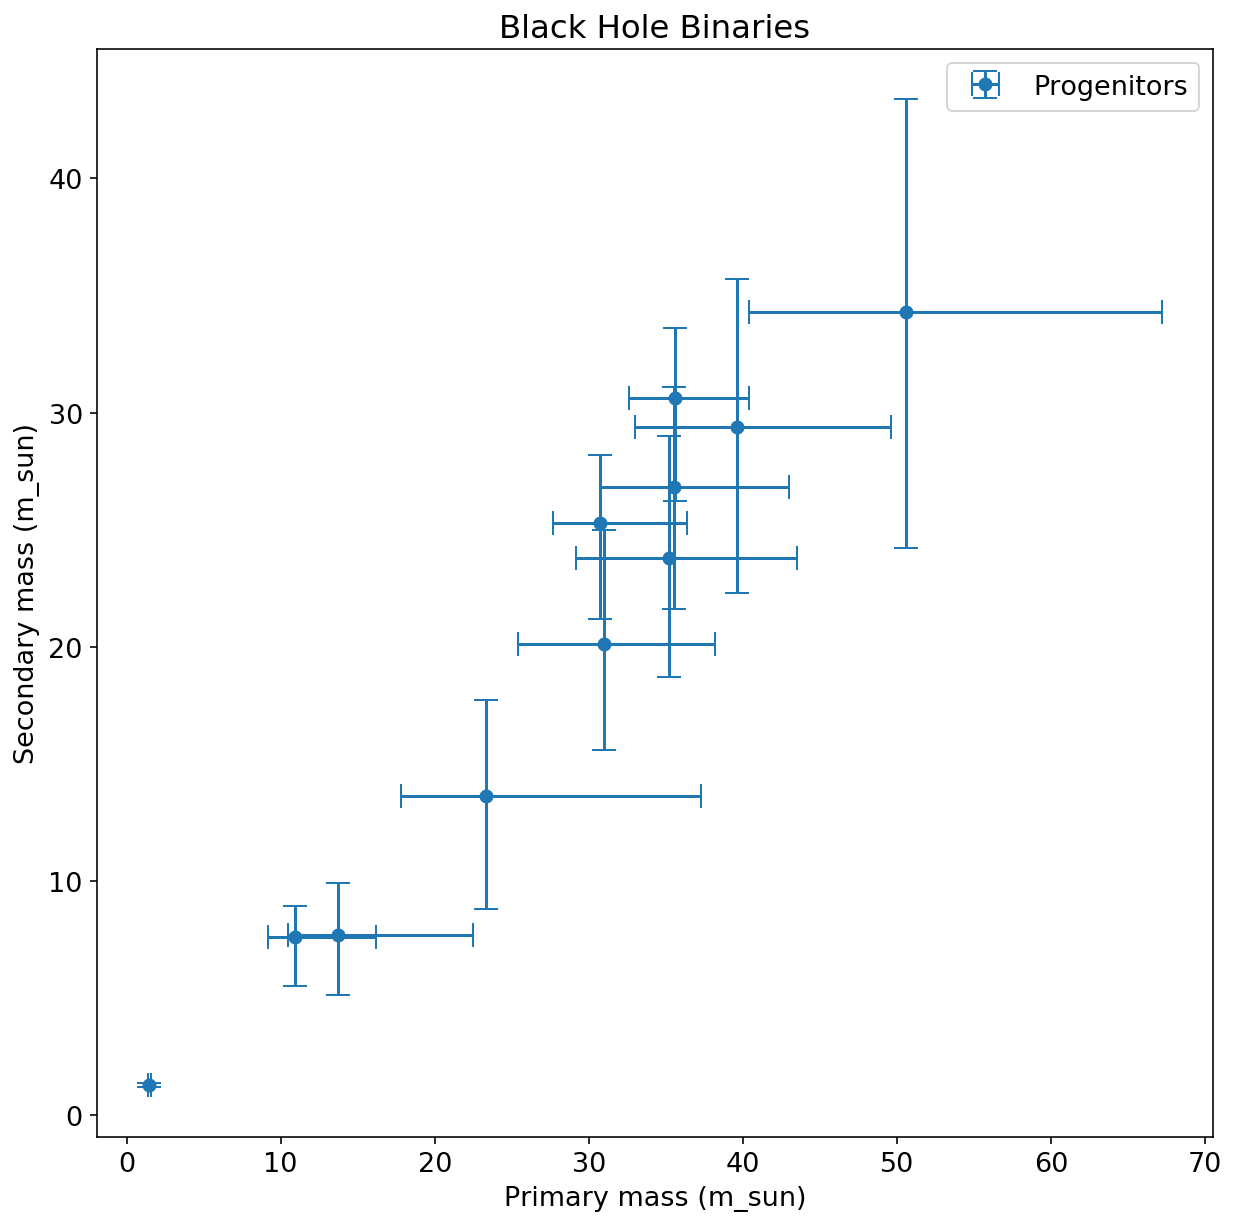

In [69]:
fig = plt.figure(figsize = (10,10))
plt.errorbar(p_mass,s_mass, xerr = (p_dnerr,p_uperr), yerr = (s_dnerr,s_uperr),  
             label = 'Progenitors', linestyle = '', capsize = 6, marker = 'o')
plt.xlabel('Primary mass (m_sun)')
plt.ylabel('Secondary mass (m_sun)')
plt.title('Black Hole Binaries')
plt.legend();

Try a linear regression on this!

In [70]:
p_mass_pd = pd.DataFrame({'Column1': p_mass[:] })
s_mass_pd = pd.DataFrame({'Column1': s_mass[:] })

In [71]:
p_mass_pd = np.asarray(p_mass)
s_mass_pd = np.asarray(s_mass)
p_mass_pd.shape
s_mass_pd.shape

(11,)

In [72]:
##  Linear regression - from hack session? - without errors!

clf = LinearRegression()
clf.fit(p_mass_pd[:,None],s_mass_pd)
s_mass_fit = clf.predict(p_mass_pd[:,None])

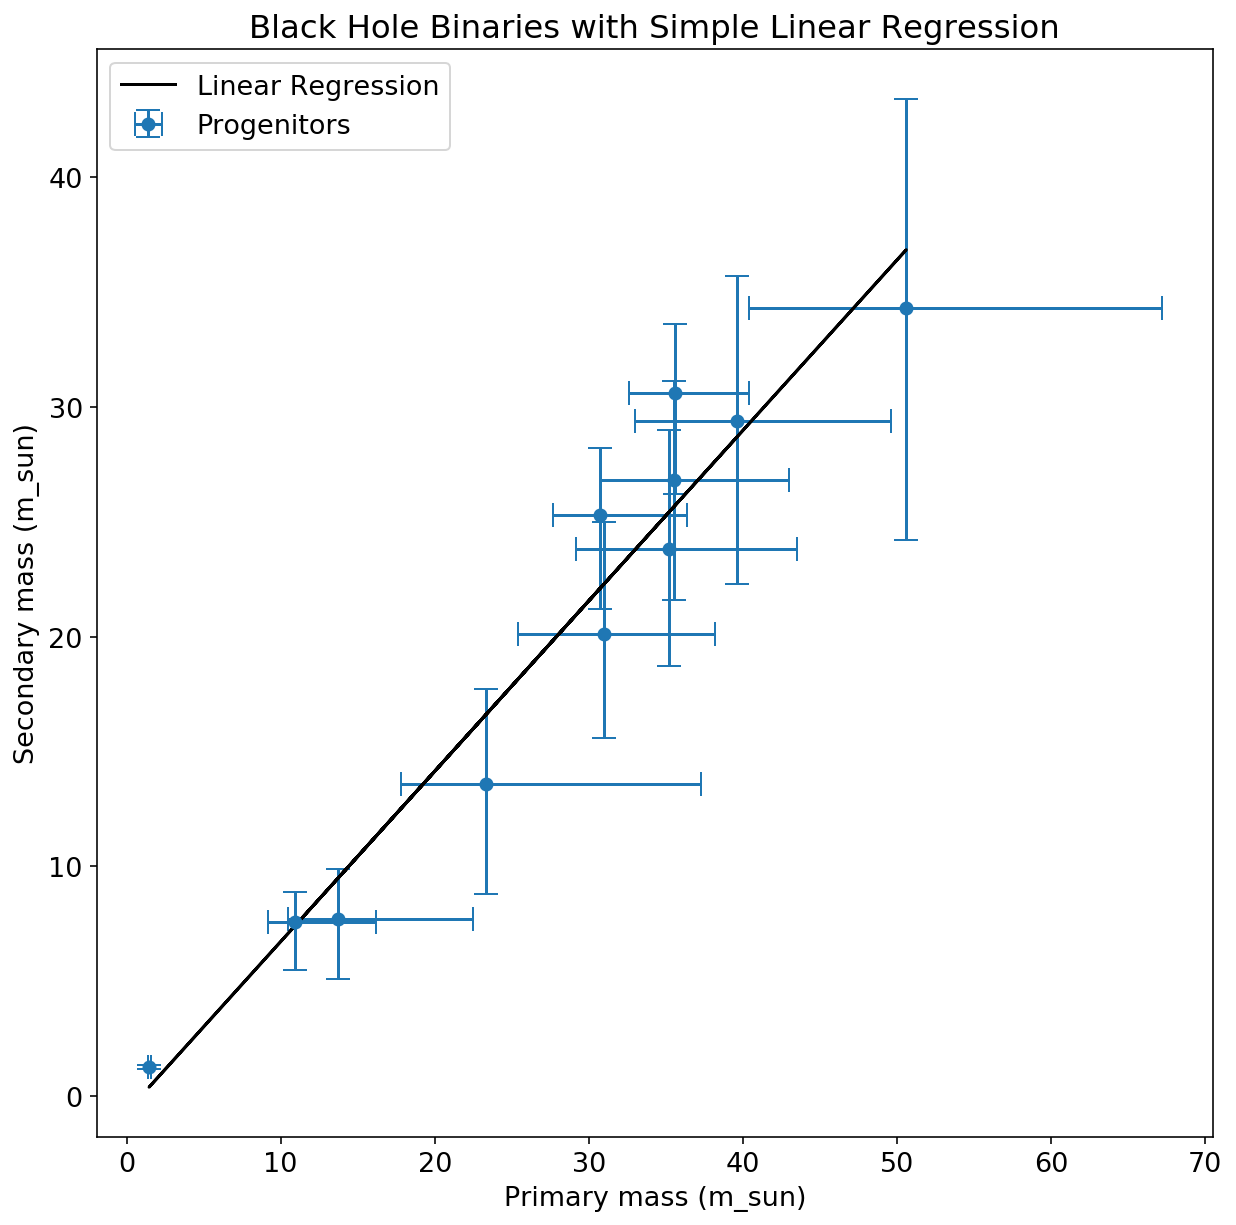

In [73]:
fig = plt.figure(figsize = (10,10))
plt.errorbar(p_mass,s_mass, xerr = (p_dnerr,p_uperr), yerr = (s_dnerr,s_uperr),  
             label = 'Progenitors', linestyle = '', capsize = 6, marker = 'o')
plt.plot(p_mass,s_mass_fit, '-k', label = 'Linear Regression')
plt.xlabel('Primary mass (m_sun)')
plt.ylabel('Secondary mass (m_sun)')
plt.title('Black Hole Binaries with Simple Linear Regression')
plt.legend();

In [74]:
##  linmix Fit
x=p_mass
y = s_mass
xerr = []
yerr = []
for i in range(len(p_dnerr)):
    if p_dnerr[i] <= p_uperr[i]:
        xerr.append(p_uperr[i])
    else:
        xerr.append(p_dnerr[i])
    if s_dnerr[i] <= s_uperr[i]:
        yerr.append(s_uperr[i])
    else:
        yerr.append(s_dnerr[i])
    
#xerr = p_dnerr
#yerr=s_dnerr

lx = linmix.LinMix(x,y,xsig=xerr,ysig=yerr)
lx.run_mcmc(silent=True)

zeropoints = np.median(lx.chain[:]['alpha'])
slopes = np.median(lx.chain[:]['beta'])
scatters = np.sqrt(np.median(lx.chain[:]['sigsqr']))

''

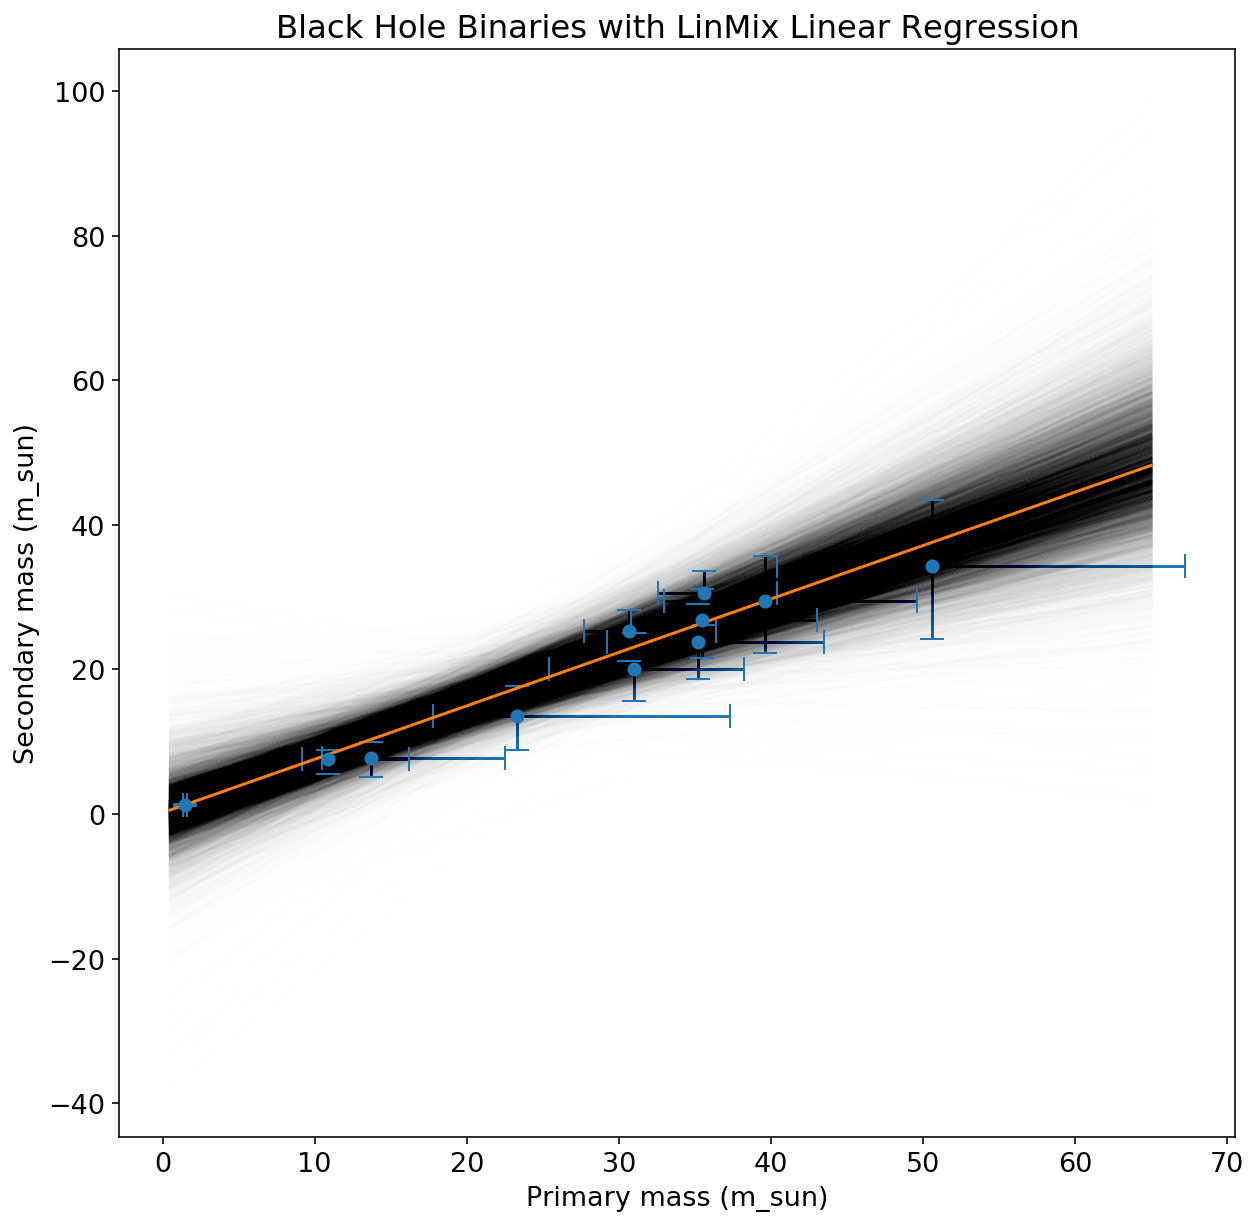

In [77]:
xplot = np.linspace(.5,65,50)

fig = plt.figure(figsize = (10,10))

for i in range(len(lx.chain)):
    plt.plot(xplot,xplot*lx.chain[i]['beta']+lx.chain[i]['alpha'],color = 'k',alpha=0.005)

plt.errorbar(p_mass,s_mass, xerr = (p_dnerr,p_uperr), yerr = (s_dnerr,s_uperr),  
             label = 'Progenitors', linestyle = '', capsize = 6, marker = 'o')

plt.plot(xplot,xplot*slopes+zeropoints)


plt.xlabel('Primary mass (m_sun)')
plt.ylabel('Secondary mass (m_sun)')
plt.title('Black Hole Binaries with LinMix Linear Regression')
#plt.legend()
;


This takes a long time to run - probably less than a minute or two, but still.

[1.6, 2.0, 0.3, 2.1, 0.2, 6.5, 2.1, 1.4, 0.001, 2.1, 4.2]


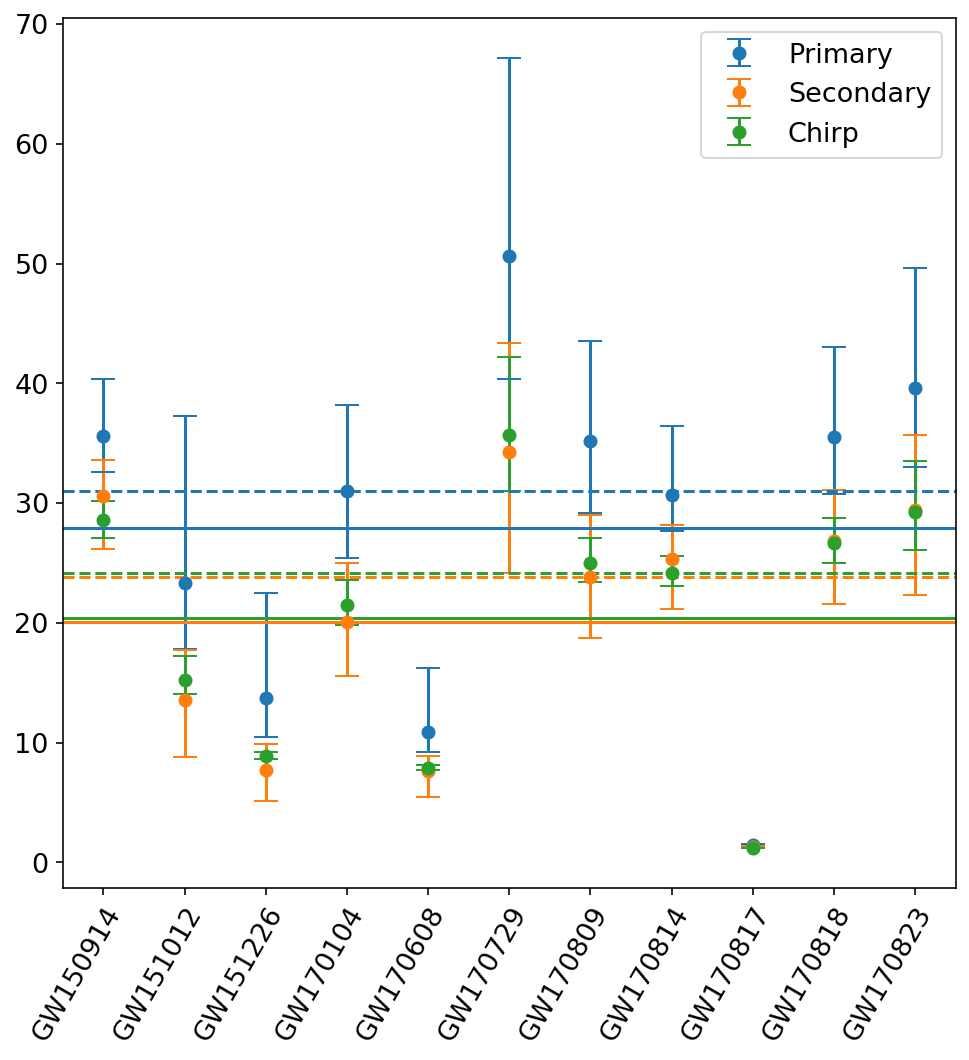

In [78]:
p_ave = np.mean(p_mass)
s_ave = np.mean(s_mass)
c_ave = np.mean(c_mass)
p_med = np.median(p_mass)
s_med = np.median(s_mass)
c_med = np.median(c_mass)

print(c_uperr)


fig, ax = plt.subplots(figsize = (8,8))
ax.errorbar(eventlist,p_mass, yerr = (p_dnerr,p_uperr), label = 'Primary',
            linestyle = '', capsize = 6, marker = 'o')
ax.errorbar(eventlist,s_mass, yerr = (s_dnerr,s_uperr), label = 'Secondary', 
            linestyle = '', capsize = 6, marker = 'o')
ax.errorbar(eventlist,c_mass, yerr = (c_dnerr,c_uperr), label = 'Chirp', 
            linestyle = '', capsize = 6, marker = 'o')

ax.axhline(p_ave, color = 'C0')
ax.axhline(s_ave, color = 'C1')
ax.axhline(c_ave, color = 'C2')
ax.axhline(p_med, color = 'C0', linestyle = '--')
ax.axhline(s_med, color = 'C1', linestyle = '--')
ax.axhline(c_med, color = 'C2', linestyle = '--')

ax.legend()
plt.setp(ax.get_xticklabels(), rotation=60, ha="right",
         rotation_mode="anchor");

This is good!  Median might be more robust than mean...  try plotting that.

The solid lines are the means and the dashed lines are the medians.


###  Marginal triggers

In [35]:
csv_marginals = pd.read_json('./marginal.json', orient='records')

In [36]:
csv_marginals = pd.read_csv('./marginals_copied.csv')

In [37]:
csv_marginals

,Event,GPS Time (s),FAR (yr^-1),Pipeline,Network SNR,Detector Frame Chirp Mass (M_sun),Data Quality
0,151008,1.128349e+09,10.17,pycbc,8.8,5.12,No artifacts
1,151012A,1.128667e+09,8.56,gstlal,9.6,2.01,Artifacts present
2,151116,1.131749e+09,4.77,pycbc,9.0,1.24,No artifacts
3,161202,1.164686e+09,6.00,gstlal,10.5,1.54,Artifacts can account for
4,161217,1.165994e+09,10.12,gstlal,10.7,7.86,Artifacts can account for
5,170208,1.170586e+09,11.18,gstlal,10.0,7.39,Artifacts present
6,170219,1.171548e+09,6.26,gstlal,9.6,1.53,No artifacts
7,170405,1.175426e+09,4.55,gstlal,9.3,1.44,Artifacts present
8,170412,1.176048e+09,8.22,gstlal,9.7,4.36,Artifacts can account for
9,170423,1.176985e+09,6.47,gstlal,8.9,1.17,No artifacts


In [38]:
csv_marginals.columns

Index(['Event', 'GPS Time (s)', 'FAR (yr^-1)', 'Pipeline', 'Network SNR',
       'Detector Frame Chirp Mass (M_sun)', 'Data Quality'],
      dtype='object')

In [39]:
mg = csv_marginals['Detector Frame Chirp Mass (M_sun)']
mg_events = csv_marginals['Event']
mg_SNRlist = csv_marginals['Network SNR']
mg_FARlist = csv_marginals['FAR (yr^-1)']
mg_pipeline = csv_marginals['Pipeline']
mg_DataQuality = csv_marginals['Data Quality']

mg_mass = []
for i in range(len(mg.values)):
    mass = mg.values[i]
    mg_mass.append(mass)
    
print(mg_mass)
mg_ave = np.mean(mg_mass)
mg_med = np.median(mg_mass)



mg_snr = []
for i in range(len(mg_SNRlist.values)):
    snr = np.float(mg_SNRlist.values[i])
    mg_snr.append(snr)
    


mg_far = []
for i in range(len(mg_FARlist.values)):
    far = np.float(mg_FARlist.values[i])
    mg_far.append(far)


eventlist_mg = []
for i in range(len(mg_events.values)):
    ev = mg_events.values[i][0:8]
    eventlist_mg.append(ev)
    #print(mg_events.values[i])
    
    
mg_pipe = []
for i in range(len(mg_pipeline.values)):
    ev = mg_pipeline.values[i]
    mg_pipe.append(ev)
    
    
mg_DQ = []
for i in range(len(mg_DataQuality.values)):
    ev = mg_DataQuality.values[i]
    mg_DQ.append(ev)
    
print(mg_DQ)
#

[5.12, 2.01, 1.24, 1.54, 7.86, 7.39, 1.53, 1.44, 4.36, 1.17, 2.75, 0.9, 3.4, 5.96]
['No artifacts', 'Artifacts present', 'No artifacts', 'Artifacts can account for', 'Artifacts can account for', 'Artifacts present', 'No artifacts', 'Artifacts present', 'Artifacts can account for', 'No artifacts', 'Artifacts present', 'Artifacts present', 'No artifacts', 'Artifacts can account for']


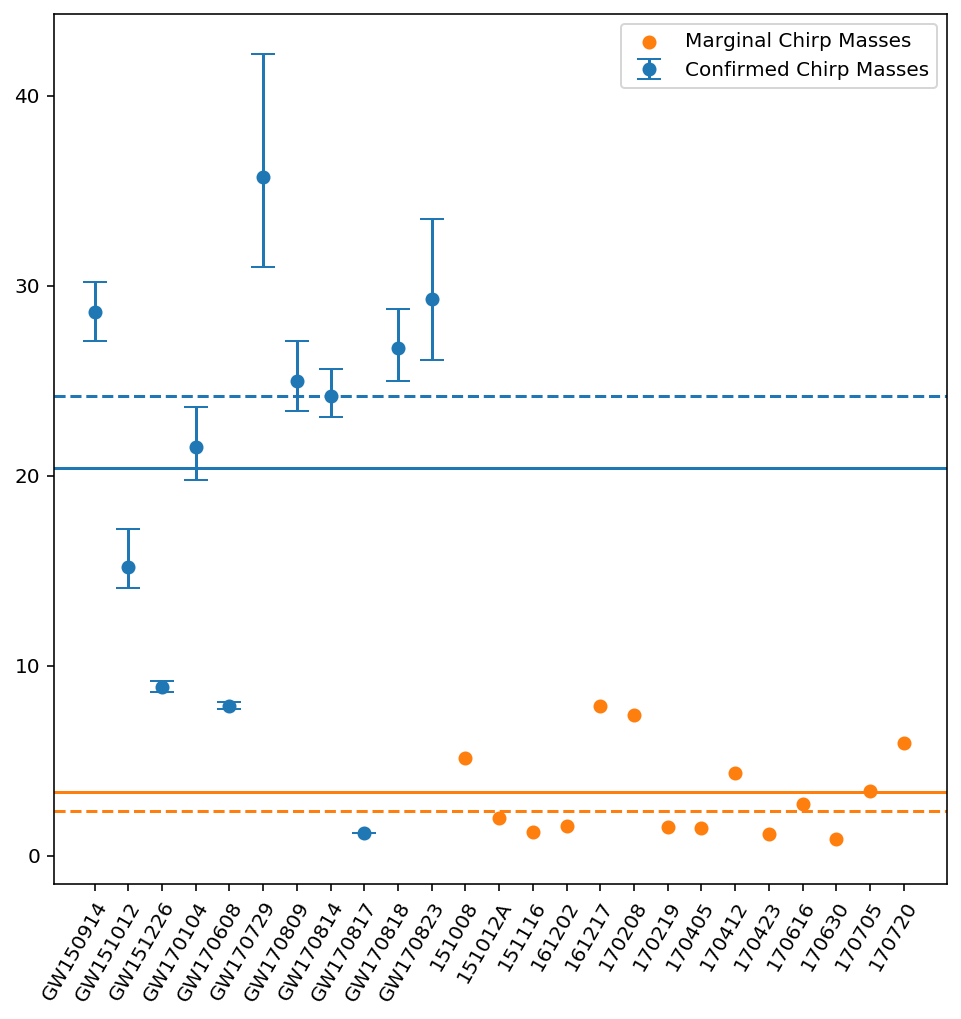

In [40]:


fig, ax = plt.subplots(figsize = (8,8))
ax.errorbar(eventlist,c_mass, yerr = (c_dnerr,c_uperr), label = 'Confirmed Chirp Masses', 
            linestyle = '', capsize = 6, marker = 'o')
ax.scatter(eventlist_mg,mg_mass, label = 'Marginal Chirp Masses',
           marker = 'o', color = 'C1')

ax.axhline(c_ave, color = 'C0')
ax.axhline(mg_ave, color = 'C1')

ax.axhline(c_med, color = 'C0', linestyle = '--')
ax.axhline(mg_med, color = 'C1', linestyle = '--')


ax.legend()
plt.setp(ax.get_xticklabels(), rotation=60, ha="right",
         rotation_mode="anchor");

What is this tiny confirmed one? neutron-neutron?

## Analyze noise measures

In [41]:
#Read in noise measures for confirmed detections
snr1_conf = []
for i in range(len(snr1.values)):
    snr = np.float(snr1.values[i])  
    snr1_conf.append(snr)
    #print(snr1.values[i])  
#print(snr1_conf)


snr2_conf = []
for i in range(len(snr2.values)):
    snr = np.float(snr2.values[i])  
    snr2_conf.append(snr)
    #print(snr2.values[i])   
#print(snr2_conf)


snr3_conf = []
for i in range(len(snr3.values)):
    snr = np.float(snr3.values[i])  
    snr3_conf.append(snr)
    #print(snr3.values[i])
#print(snr3_conf)


far1_conf = []
far1_uplim = []
for i in range(len(far1.values)):
    if '<' not in str(far1.values[i]) and 'nan' not in str(far1.values[i]):
        far = np.float(far1.values[i])
        far1_conf.append(far)
        far1_uplim.append(0)  ##Not an upper limit
        #print(far1.values[i])
    elif 'nan' in str(far1.values[i]):
        far1_conf.append(0.0)
        far1_uplim.append(0)  ##Not an upper limit
        #print(far1.values[i])
    elif '<' in far1.values[i]:
        far = np.float(far1.values[i].strip('<'))
        far1_conf.append(far)
        far1_uplim.append(1)  ##Is an ipper limit
        #print(far1.values[i])
print(far1_conf)


far2_conf = []
far2_uplim = []
for i in range(len(far2.values)):
    if '<' not in str(far2.values[i]) and 'nan' not in str(far2.values[i]):
        far = np.float(far2.values[i])
        far2_conf.append(far)
        far2_uplim.append(0)  ##Not an upper limit
        #print(far1.values[i])
    elif 'nan' in str(far2.values[i]):
        far2_conf.append(0.0)
        far2_uplim.append(0)  ##Not an upper limit
        #print(far1.values[i])
    elif '<' in far2.values[i]:
        far = np.float(far2.values[i].strip('<'))
        far2_conf.append(far)
        far2_uplim.append(1)  ##Is an ipper limit
        #print(far1.values[i])
print(far2_conf)



far3_conf = []
far3_uplim = []
for i in range(len(far3.values)):
    if '<' not in str(far3.values[i]) and 'nan' not in str(far3.values[i]):
        far = np.float(far3.values[i])
        far3_conf.append(far)
        far3_uplim.append(0)  ##Not an upper limit
        #print(far1.values[i])
    elif 'nan' in str(far3.values[i]):
        far3_conf.append(0.0)
        far3_uplim.append(0)  ##Not an upper limit
        #print(far1.values[i])
    elif '<' in far3.values[i]:
        far = np.float(far3.values[i].strip('<'))
        far3_conf.append(far)
        far3_uplim.append(1)  ##Is an ipper limit
        #print(far1.values[i])
print(far3_conf)


[0.000163, 0.0, 0.02, 0.000291, 0.000144, 0.02, 0.0, 0.000208, 0.0, 0.0, 0.00214]
[1e-07, 0.00792, 1e-07, 1e-07, 1e-07, 0.18, 1e-07, 1e-07, 1e-07, 4.2e-05, 1e-07]
[1.53e-05, 0.17, 1.69e-05, 1.37e-05, 0.000309, 1.36, 0.000145, 1.25e-05, 1.25e-05, 0.0, 3.29e-05]


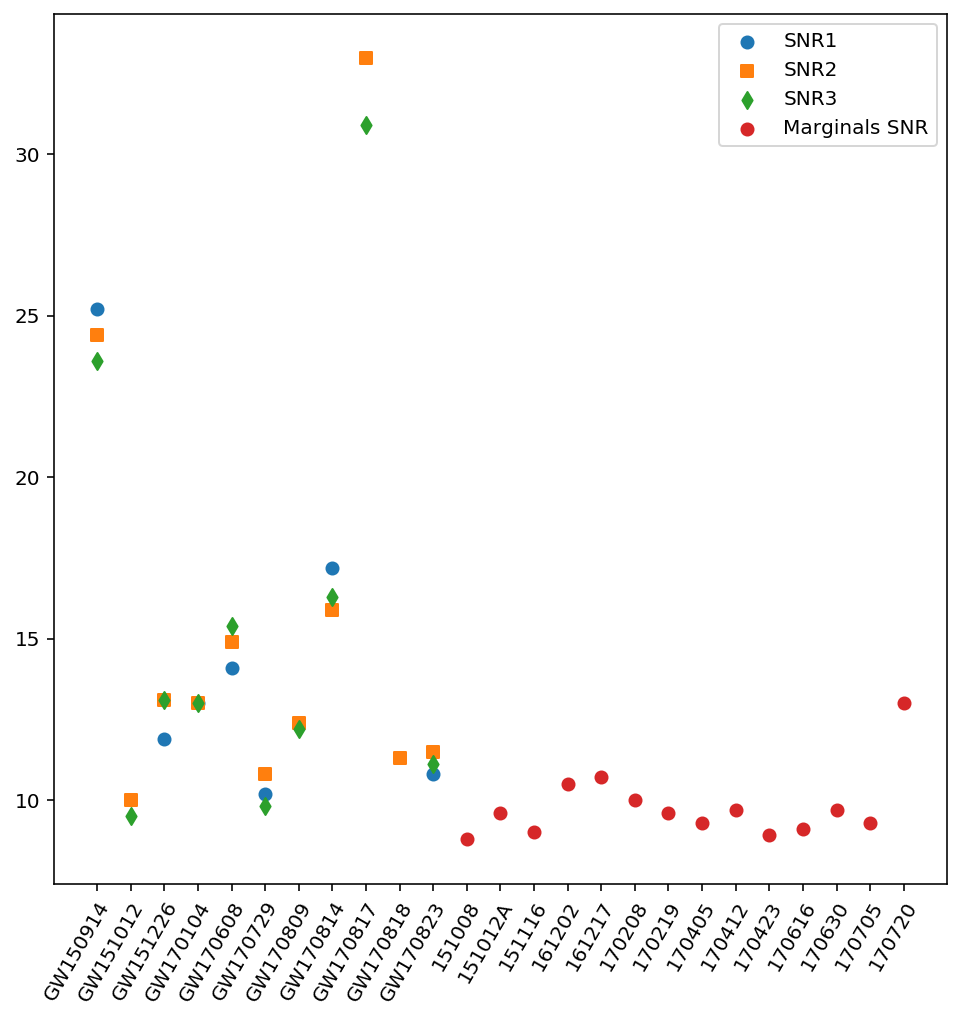

In [42]:
fig, ax = plt.subplots(figsize = (8,8))
ax.scatter(eventlist,snr1_conf, label = 'SNR1', marker = 'o')
ax.scatter(eventlist,snr2_conf, label = 'SNR2', marker = 's')
ax.scatter(eventlist,snr3_conf, label = 'SNR3', marker = 'd')

ax.scatter(eventlist_mg, mg_snr, label = 'Marginals SNR', marker = 'o')
#ax.scatter(eventlist,far1_conf, label = 'FAR1', marker = 'o')
#ax.scatter(eventlist,far2_conf, label = 'FAR2', marker = 'o')
#ax.scatter(eventlist,far3_conf, label = 'FAR3', marker = 'o')


ax.legend()
plt.setp(ax.get_xticklabels(), rotation=60, ha="right",
         rotation_mode="anchor");

The fact that the far values are appended as strings means that the y axis is garbage in the following plots.  It's not actually ordering it by the values.  I need to convert something somewhere to floats...

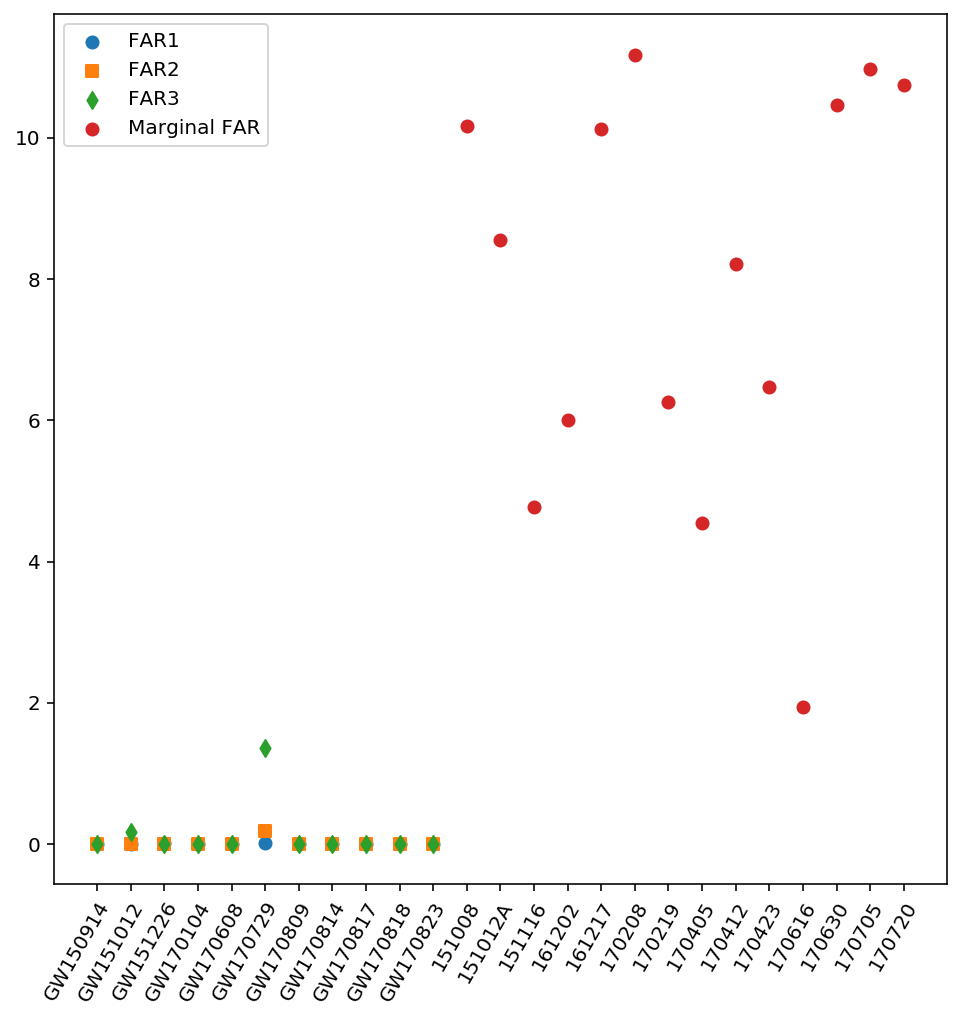

In [43]:
fig, ax = plt.subplots(figsize = (8,8))
#ax.scatter(eventlist,snr1_conf, label = 'SNR1', marker = 'o')
#ax.scatter(eventlist,snr2_conf, label = 'SNR2', marker = 's')
#ax.scatter(eventlist,snr3_conf, label = 'SNR3', marker = 'd')
ax.scatter(eventlist,far1_conf, label = 'FAR1', marker = 'o')
ax.scatter(eventlist,far2_conf, label = 'FAR2', marker = 's')
ax.scatter(eventlist,far3_conf, label = 'FAR3', marker = 'd')


ax.scatter(eventlist_mg, mg_far, label = 'Marginal FAR', marker = 'o')

ax.legend()
plt.setp(ax.get_xticklabels(), rotation=60, ha="right",
         rotation_mode="anchor");

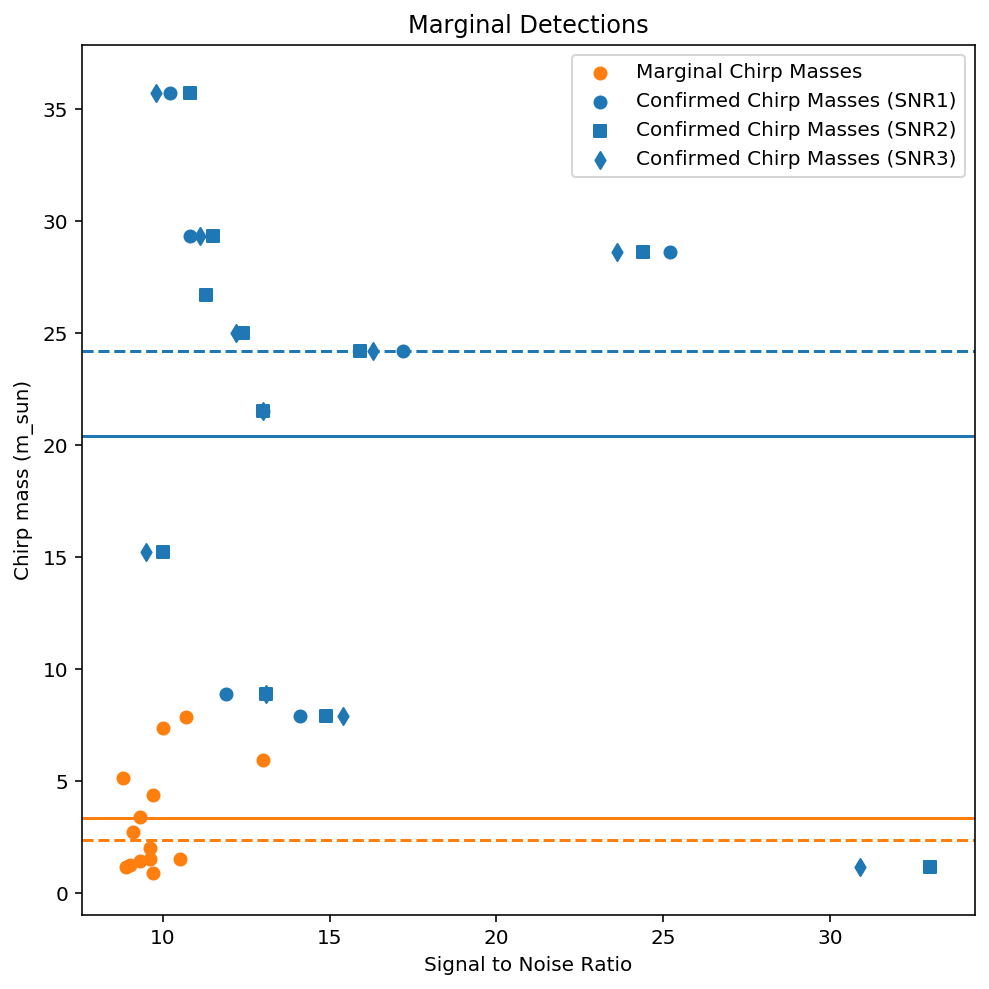

In [44]:
fig, ax = plt.subplots(figsize = (8,8))
#ax.errorbar(eventlist,c_mass, yerr = (c_dnerr,c_uperr), label = 'Confirmed Chirp Masses', 
#            linestyle = '', capsize = 6, marker = 'o')
ax.scatter(mg_snr,mg_mass, label = 'Marginal Chirp Masses', marker = 'o', color = 'C1')
ax.scatter(snr1_conf,c_mass, label = 'Confirmed Chirp Masses (SNR1)', marker = 'o', color = 'C0')
ax.scatter(snr2_conf,c_mass, label = 'Confirmed Chirp Masses (SNR2)', marker = 's', color = 'C0')
ax.scatter(snr3_conf,c_mass, label = 'Confirmed Chirp Masses (SNR3)', marker = 'd', color = 'C0')

ax.axhline(c_ave, color = 'C0')
ax.axhline(mg_ave, color = 'C1')

ax.axhline(c_med, color = 'C0', linestyle = '--')
ax.axhline(mg_med, color = 'C1', linestyle = '--')

plt.xlabel('Signal to Noise Ratio')
plt.ylabel('Chirp mass (m_sun)')
plt.title('Marginal Detections')



ax.legend(frameon=True);

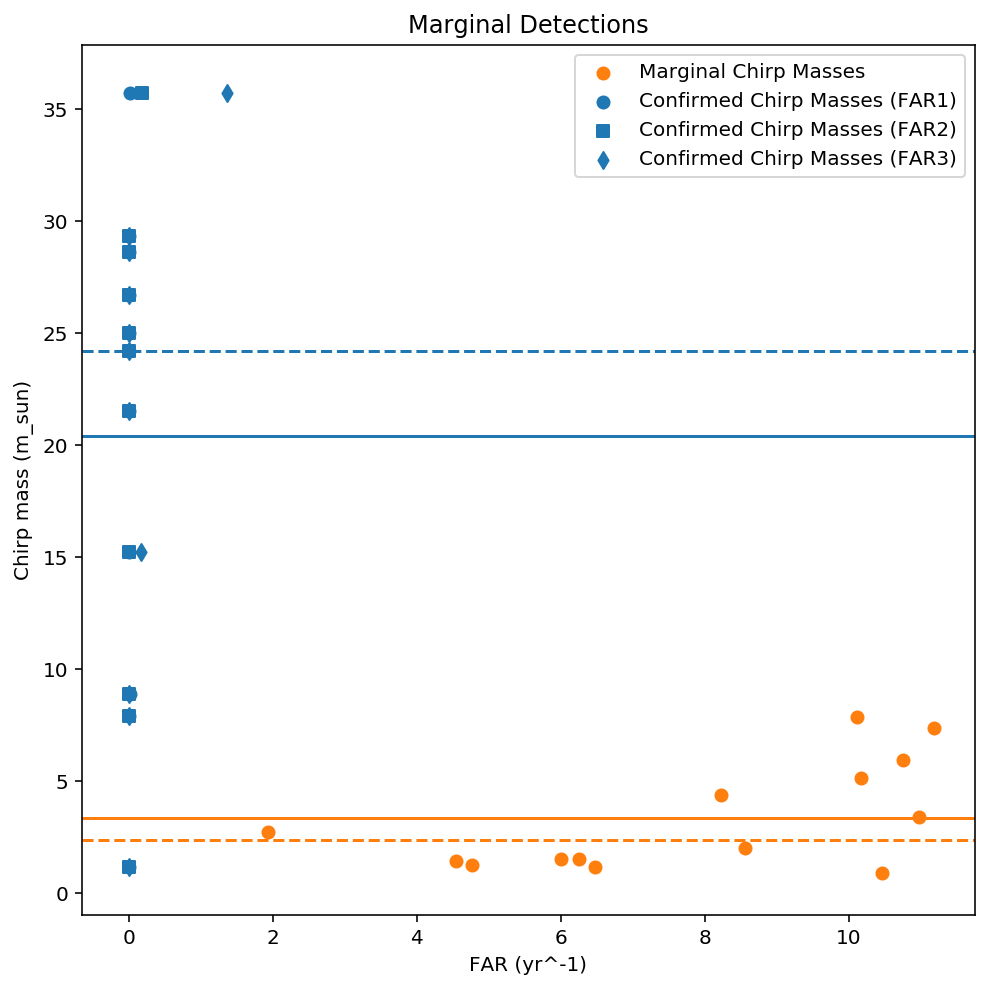

In [45]:
fig, ax = plt.subplots(figsize = (8,8))
#ax.errorbar(eventlist,c_mass, yerr = (c_dnerr,c_uperr), label = 'Confirmed Chirp Masses', 
#            linestyle = '', capsize = 6, marker = 'o')
ax.scatter(mg_far,mg_mass, label = 'Marginal Chirp Masses', marker = 'o', color = 'C1')
ax.scatter(far1_conf,c_mass, label = 'Confirmed Chirp Masses (FAR1)', marker = 'o', color = 'C0')
ax.scatter(far2_conf,c_mass, label = 'Confirmed Chirp Masses (FAR2)', marker = 's', color = 'C0')
ax.scatter(far3_conf,c_mass, label = 'Confirmed Chirp Masses (FAR3)', marker = 'd', color = 'C0')

ax.axhline(c_ave, color = 'C0')
ax.axhline(mg_ave, color = 'C1')

ax.axhline(c_med, color = 'C0', linestyle = '--')
ax.axhline(mg_med, color = 'C1', linestyle = '--')

plt.xlabel('FAR (yr^-1)')
plt.ylabel('Chirp mass (m_sun)')
plt.title('Marginal Detections')



ax.legend(frameon=True);

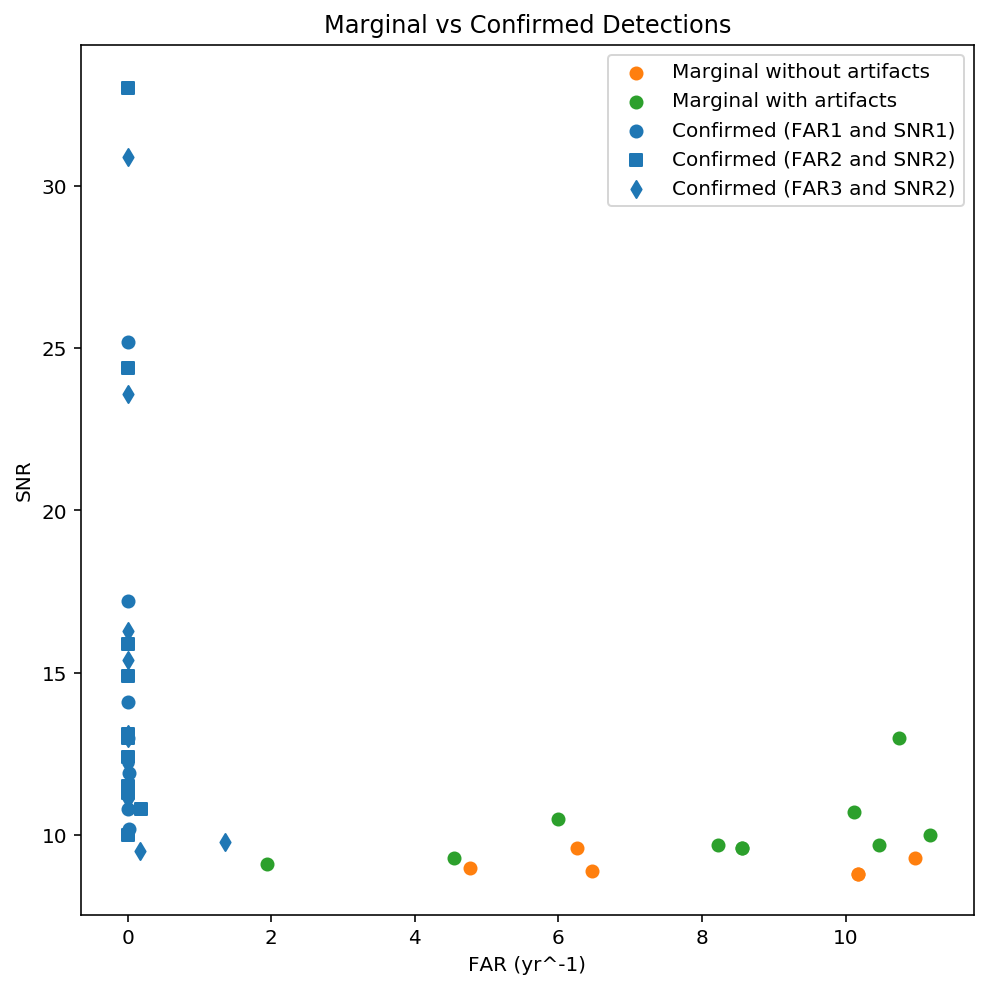

In [46]:
fig, ax = plt.subplots(figsize = (8,8))
#ax.errorbar(eventlist,c_mass, yerr = (c_dnerr,c_uperr), label = 'Confirmed Chirp Masses', 
#            linestyle = '', capsize = 6, marker = 'o')

for i in range(len(mg_far)):
    if 'No' in mg_DQ[i]:
        ax.scatter(mg_far[i],mg_snr[i], marker = 'o', color = 'C1')
    else:
        ax.scatter(mg_far[i],mg_snr[i], marker = 'o', color = 'C2')

ax.scatter(mg_far[0],mg_snr[0], marker = 'o', color = 'C1', label = 'Marginal without artifacts')
ax.scatter(mg_far[1],mg_snr[1], marker = 'o', color = 'C2', label = 'Marginal with artifacts')

ax.scatter(far1_conf,snr1_conf, label = 'Confirmed (FAR1 and SNR1)', marker = 'o', color = 'C0')
ax.scatter(far2_conf,snr2_conf, label = 'Confirmed (FAR2 and SNR2)', marker = 's', color = 'C0')
ax.scatter(far3_conf,snr3_conf, label = 'Confirmed (FAR3 and SNR2)', marker = 'd', color = 'C0')


plt.xlabel('FAR (yr^-1)')
plt.ylabel('SNR')
plt.title('Marginal vs Confirmed Detections')



ax.legend(frameon=True);

find a statistic that finds a division between these?  Is the the same as LIGO?

try kernel regression

Also... MCMC to fit model

####  Let's take a look at the relationship of the data quality column with the chirp mass, snr, and far for the marginal triggers

Not much connection, looks like...

''

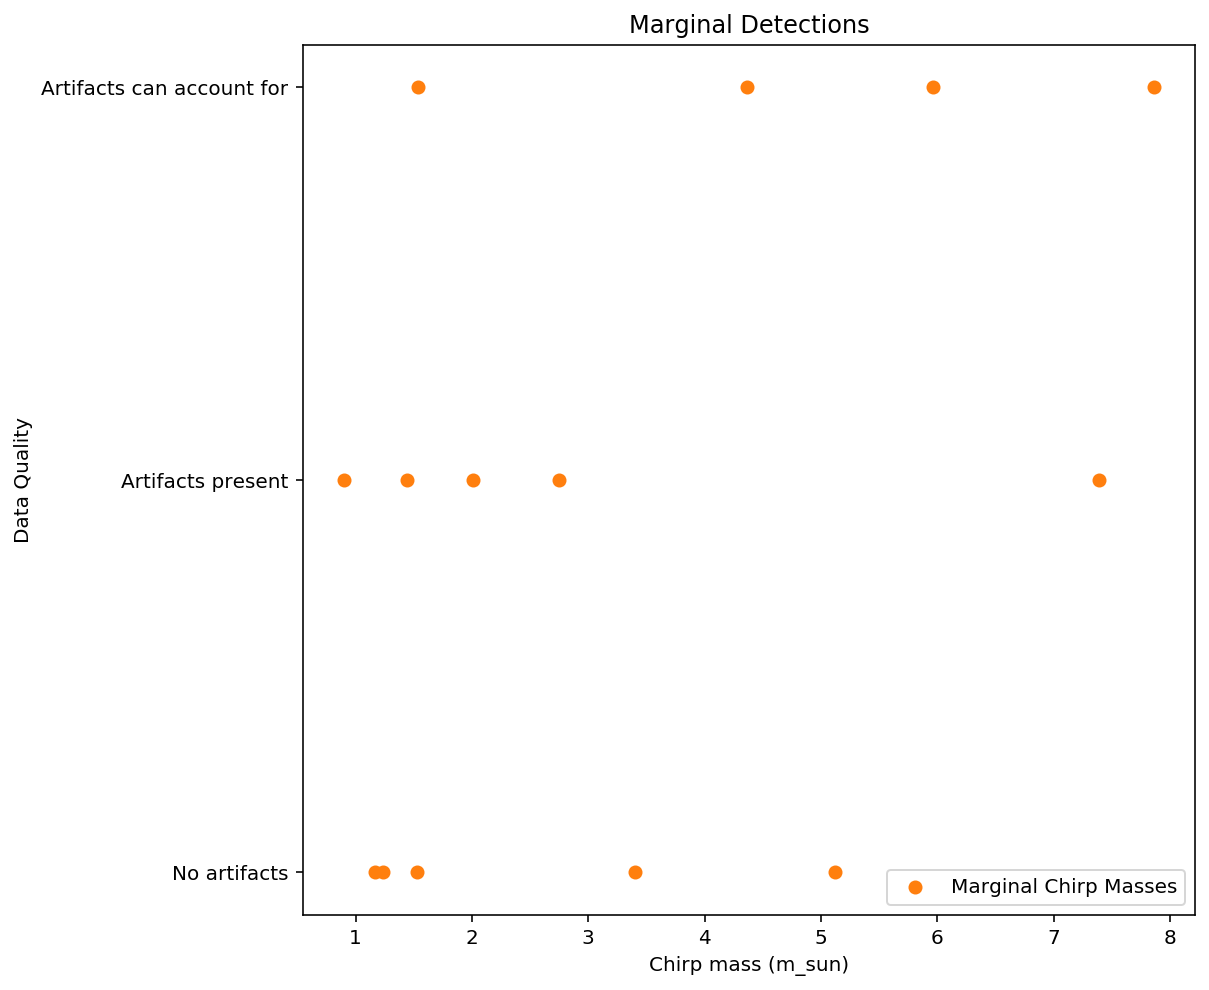

In [47]:
fig, ax = plt.subplots(figsize = (8,8))
#ax.errorbar(eventlist,c_mass, yerr = (c_dnerr,c_uperr), label = 'Confirmed Chirp Masses', 
#            linestyle = '', capsize = 6, marker = 'o')
# ax.scatter(mg_far,mg_mass, label = 'Marginal Chirp Masses', marker = 'o', color = 'C1')
# ax.scatter(far1_conf,c_mass, label = 'Confirmed Chirp Masses (FAR1)', marker = 'o', color = 'C0')
# ax.scatter(far2_conf,c_mass, label = 'Confirmed Chirp Masses (FAR2)', marker = 's', color = 'C0')
# ax.scatter(far3_conf,c_mass, label = 'Confirmed Chirp Masses (FAR3)', marker = 'd', color = 'C0')


ax.scatter(mg_mass,mg_DQ, label = 'Marginal Chirp Masses', marker = 'o', color = 'C1')

# ax.axhline(c_ave, color = 'C0')
# ax.axhline(mg_ave, color = 'C1')

# ax.axhline(c_med, color = 'C0', linestyle = '--')
# ax.axhline(mg_med, color = 'C1', linestyle = '--')

plt.ylabel('Data Quality')
plt.xlabel('Chirp mass (m_sun)')
plt.title('Marginal Detections')



ax.legend(frameon=True)
#plt.setp(ax.get_xticklabels(), rotation=60, ha="right", rotation_mode="anchor")
;

''

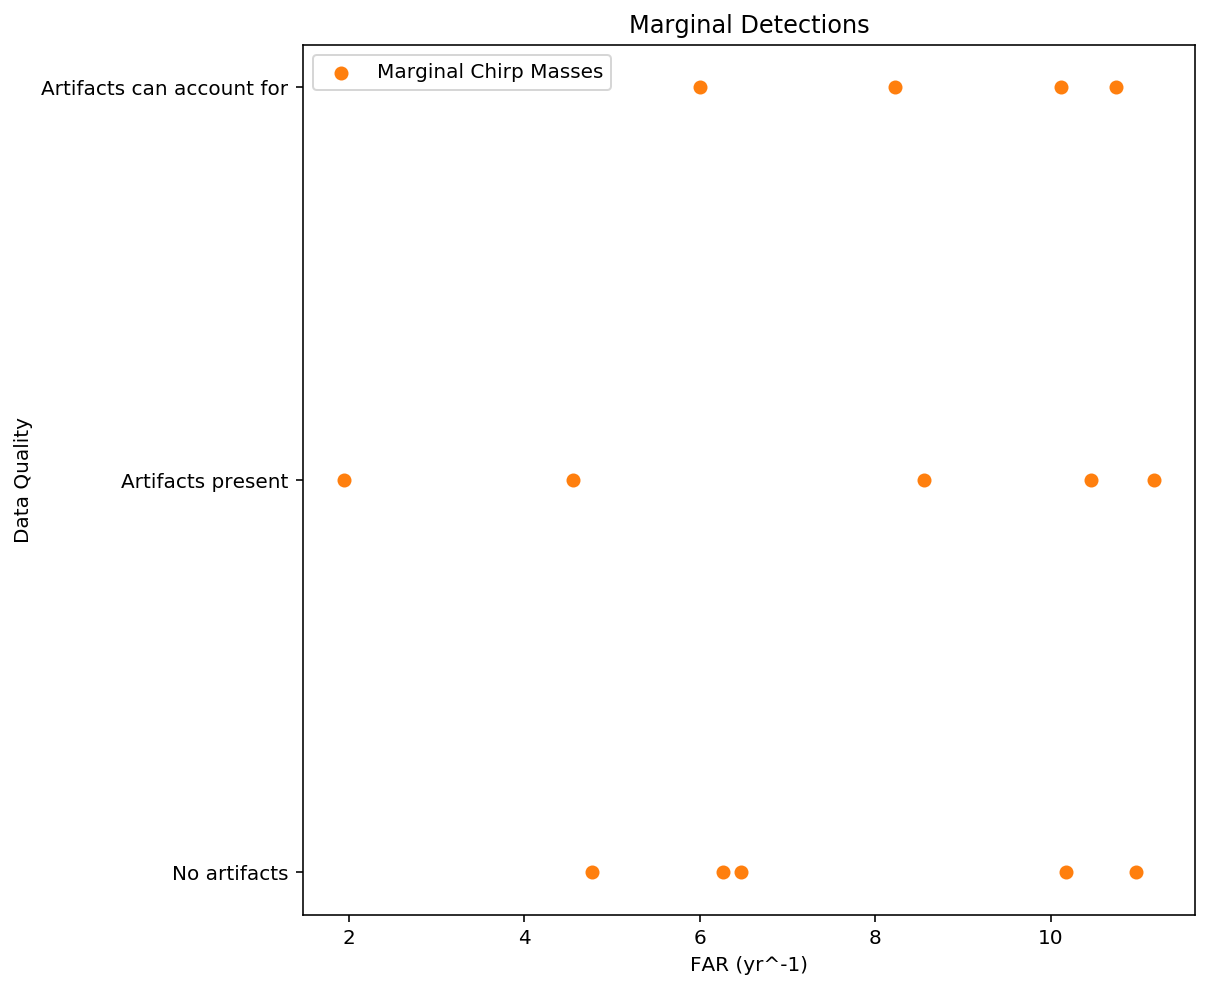

In [48]:
fig, ax = plt.subplots(figsize = (8,8))

ax.scatter(mg_far,mg_DQ, label = 'Marginal Chirp Masses', marker = 'o', color = 'C1')


plt.xlabel('FAR (yr^-1)')
plt.ylabel('Data Quality')
plt.title('Marginal Detections')



ax.legend(frameon=True)
#plt.setp(ax.get_xticklabels(), rotation=60, ha="right", rotation_mode="anchor")
;

''

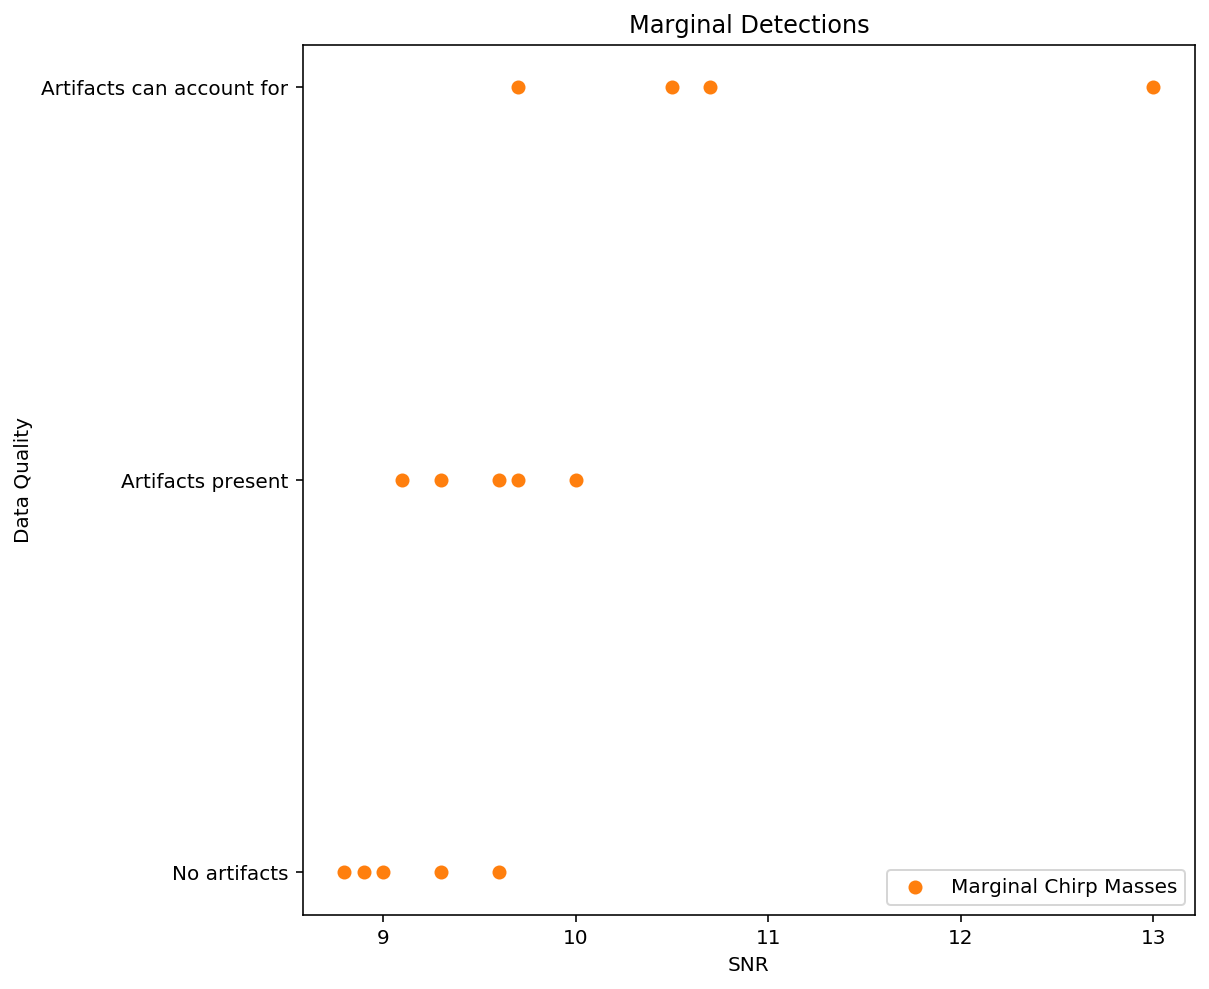

In [49]:
fig, ax = plt.subplots(figsize = (8,8))

ax.scatter(mg_snr,mg_DQ, label = 'Marginal Chirp Masses', marker = 'o', color = 'C1')


plt.xlabel('SNR')
plt.ylabel('Data Quality')
plt.title('Marginal Detections')



ax.legend(frameon=True)
#plt.setp(ax.get_xticklabels(), rotation=60, ha="right", rotation_mode="anchor")
;

####  What about the pipeline

''

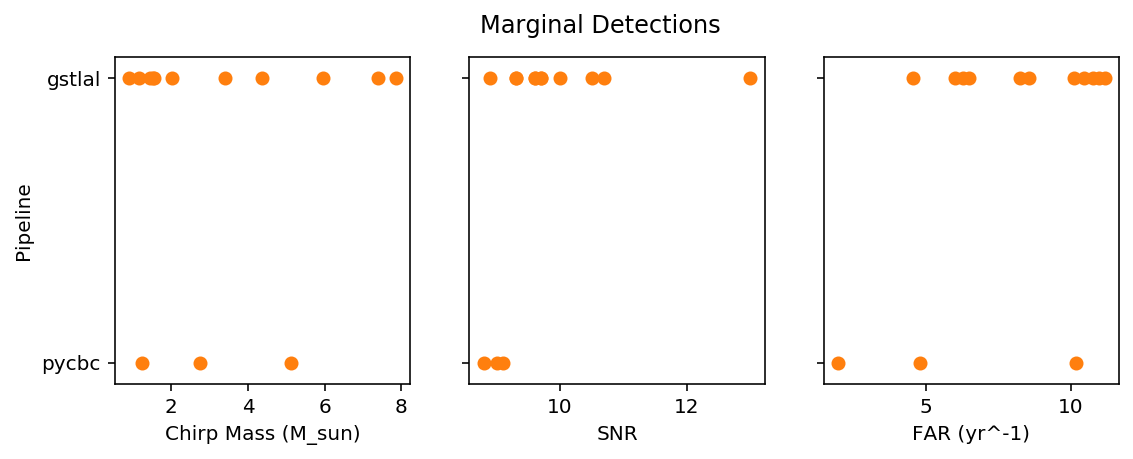

In [50]:
fig, ax = plt.subplots(1, 3, figsize=(9, 3), sharey=True)

ax[0].scatter(mg_mass,mg_pipe, label = 'Marginal Chirp Masses', marker = 'o', color = 'C1')
ax[0].set_xlabel('Chirp Mass (M_sun)')

ax[1].scatter(mg_snr,mg_pipe, label = 'Marginal Chirp Masses', marker = 'o', color = 'C1')
ax[1].set_xlabel('SNR')


ax[2].scatter(mg_far,mg_pipe, label = 'Marginal Chirp Masses', marker = 'o', color = 'C1')
ax[2].set_xlabel('FAR (yr^-1)')

ax[0].set_ylabel('Pipeline')
fig.suptitle('Marginal Detections')



#ax.legend(frameon=True)
#plt.setp(ax.get_xticklabels(), rotation=60, ha="right", rotation_mode="anchor")
;

So, also no clear trend here - which is good.  We don't want the significance to depend on the pipeline used.